***Exploratory Data Analysis (EDA) for products***

In [1]:
# استيراد المكتبات الأساسية
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Load Data***

In [2]:
# تحديد مسار الملف
file_path = '~/code/Alanoudis/food-delivery-rec/data/updated_data/products_sg.txt'

# تحميل البيانات
data = pd.read_csv(file_path)

# عرض أول 5 صفوف من البيانات للتأكد من تحميلها بشكل صحيح
data.head()

,Unnamed: 0,vendor_id,product_id,name,unit_price
0,0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024
3,3,7112a20b,d3e7708c2bc9,Maguro Sushi,0.0012
4,4,6137ef21,bf0d5ac0e03c,Family Meal - Prosp Chic TwLEVMx2 + ChBurgerHM,0.0100


In [3]:
# فحص هيكل البيانات
data.info()

# فحص الإحصائيات الأساسية للبيانات
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066840 entries, 0 to 1066839
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1066840 non-null  int64  
 1   vendor_id   1066840 non-null  object 
 2   product_id  1066840 non-null  object 
 3   name        1066800 non-null  object 
 4   unit_price  1066840 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 40.7+ MB


,Unnamed: 0,unit_price
count,1.066840e+06,1.066840e+06
mean,5.334195e+05,3.751408e-03
std,3.079703e+05,8.651467e-03
min,0.000000e+00,0.000000e+00
25%,2.667098e+05,0.000000e+00
50%,5.334195e+05,2.400000e-03
75%,8.001292e+05,4.400000e-03
max,1.066839e+06,1.000000e+00


In [4]:
# فحص القيم المفقودة في البيانات
data.isnull().sum()


Unnamed: 0     0
vendor_id      0
product_id     0
name          40
unit_price     0
dtype: int64

In [5]:
# Replace missing values in the 'name' column with 'Unknown'
data['name'].fillna('Unknown', inplace=True)

# Check the data after replacement
data.isnull().sum()

/tmp/ipykernel_3831/1327683476.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['name'].fillna('Unknown', inplace=True)


Unnamed: 0    0
vendor_id     0
product_id    0
name          0
unit_price    0
dtype: int64

***Display statistics for the 'unit_price' column***

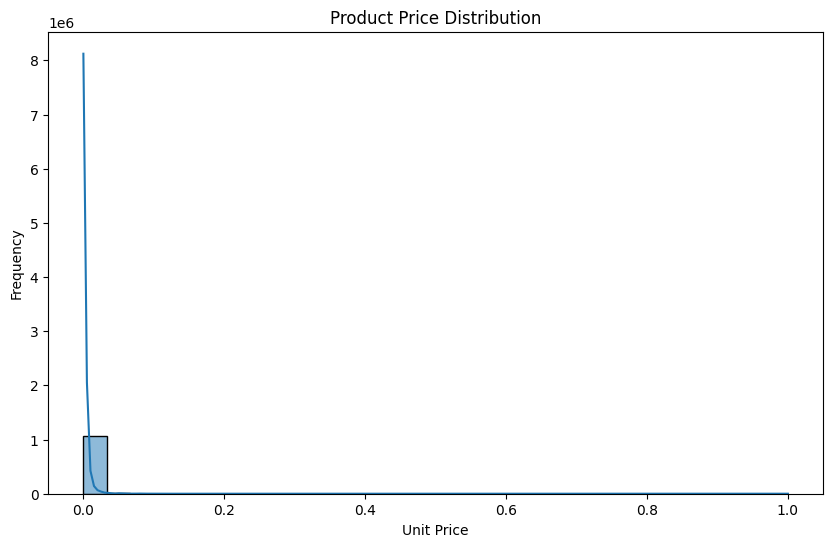

In [6]:
# Display statistics for the 'unit_price' column
data['unit_price'].describe()

# Plot the distribution of prices using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['unit_price'], bins=30, kde=True)
plt.title('Product Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


In [7]:
# تصفية البيانات التي تحتوي على سعر أقل من 0.01 أو يساوي 0
low_price_data = data[data['unit_price'] <= 0.01]

# عرض أول 5 صفوف من هذه البيانات
low_price_data.head()

,Unnamed: 0,vendor_id,product_id,name,unit_price
0,0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024
3,3,7112a20b,d3e7708c2bc9,Maguro Sushi,0.0012
4,4,6137ef21,bf0d5ac0e03c,Family Meal - Prosp Chic TwLEVMx2 + ChBurgerHM,0.0100


### Relationship Between Vendor ID and Product ID (Sample Data)


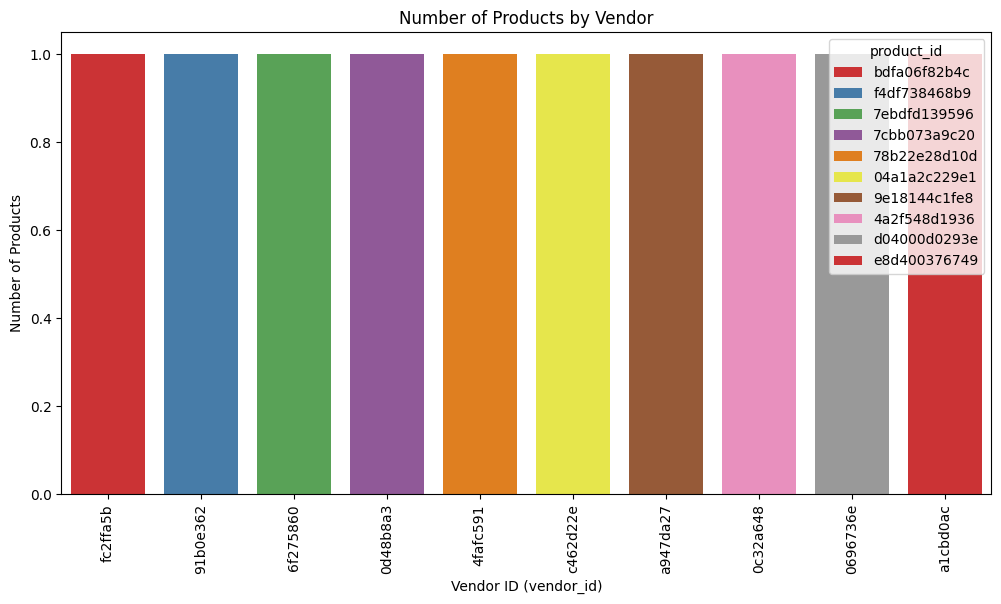

In [10]:
# Random sample of data (10 rows for example)
sample_data = data.sample(n=10, random_state=42)

# Plot the relationship between 'vendor_id' and 'product_id' using the sample
plt.figure(figsize=(12, 6))
sns.countplot(data=sample_data, x='vendor_id', hue='product_id', palette='Set1')
plt.title('Number of Products by Vendor')
plt.xlabel('Vendor ID (vendor_id)')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()

### Distribution of Product Prices by Product ID (Sample Data)


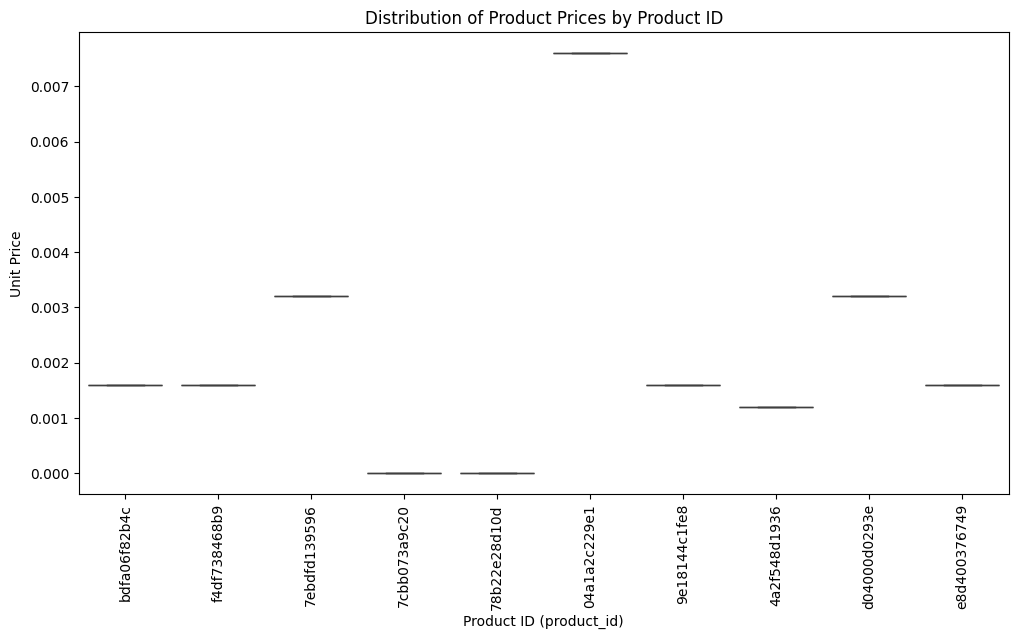

In [12]:
# Plot the relationship between unit_price and product_id
plt.figure(figsize=(12, 6))
sns.boxplot(data=sample_data, x='product_id', y='unit_price')
plt.title('Distribution of Product Prices by Product ID')
plt.xlabel('Product ID (product_id)')
plt.ylabel('Unit Price')
plt.xticks(rotation=90)
plt.show()


### Identifying Outliers in Product Prices (Sample Data)


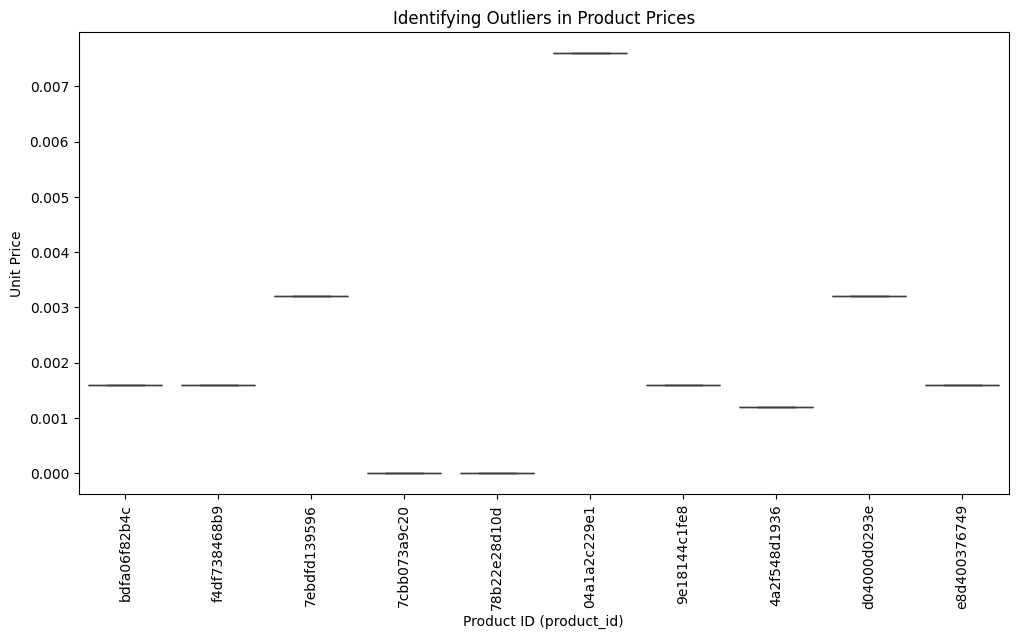

In [17]:
# Boxplot to identify outliers in 'unit_price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=sample_data, x='product_id', y='unit_price')
plt.title('Identifying Outliers in Product Prices')
plt.xlabel('Product ID (product_id)')
plt.ylabel('Unit Price')
plt.xticks(rotation=90)
plt.show()

### Calculating and Removing Outliers in Product Prices (Sample Data)


In [18]:
# Calculate the Interquartile Range (IQR)
Q1 = sample_data['unit_price'].quantile(0.25)
Q3 = sample_data['unit_price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds (values outside these bounds)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
cleaned_data = sample_data[(sample_data['unit_price'] >= lower_bound) & (sample_data['unit_price'] <= upper_bound)]

# Display the data after removing outliers
cleaned_data.head()

,Unnamed: 0,vendor_id,product_id,name,unit_price
691166,691166,fc2ffa5b,bdfa06f82b4c,Fried Garlic 炸蒜蓉,0.0016
177798,177798,91b0e362,f4df738468b9,Iced Yin Yang,0.0016
620613,620613,6f275860,7ebdfd139596,Beef Fried Rice 牛肉炒饭,0.0032
982214,982214,0d48b8a3,7cbb073a9c20,No Salt,0.0000
536646,536646,4fafc591,78b22e28d10d,Steamed Dumplings 水饺,0.0000


### Distribution of Product Prices After Removing Outliers (Cleaned Data)


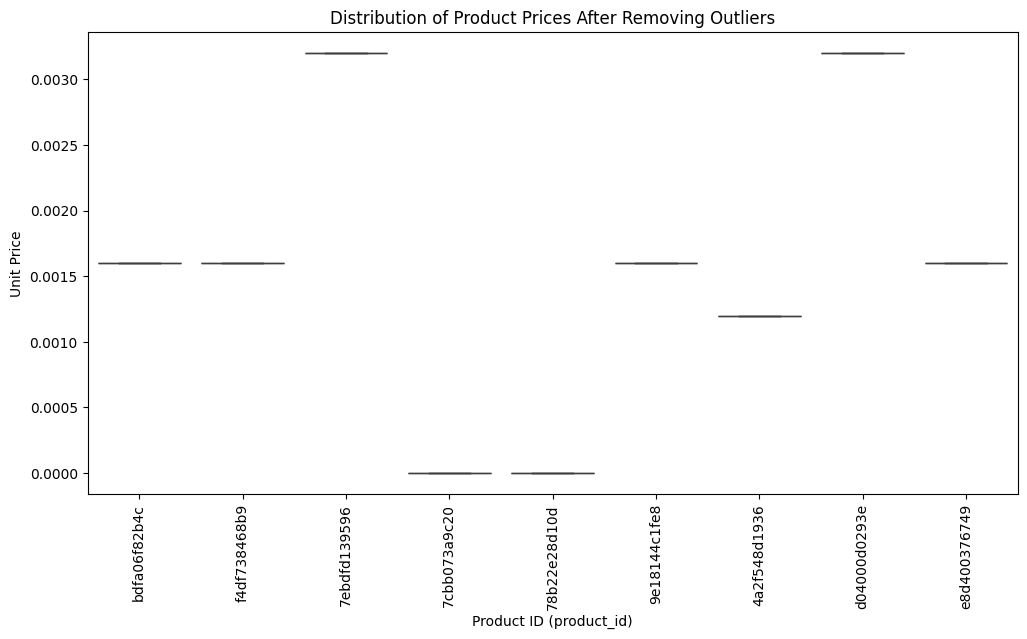

In [19]:
# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, x='product_id', y='unit_price')
plt.title('Distribution of Product Prices After Removing Outliers')
plt.xlabel('Product ID (product_id)')
plt.ylabel('Unit Price')
plt.xticks(rotation=90)
plt.show()

### Distribution of Product Prices After Removing Outliers (Cleaned Data)


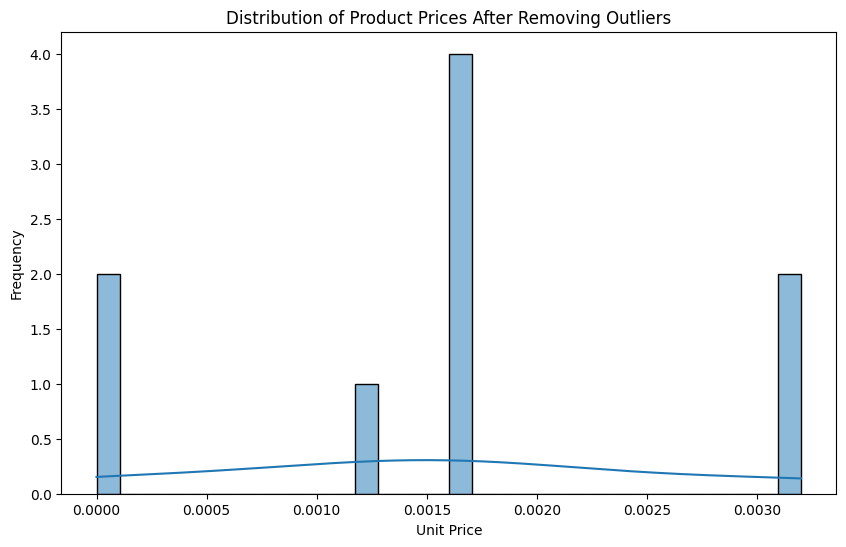

In [20]:
# Histogram after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['unit_price'], bins=30, kde=True)
plt.title('Distribution of Product Prices After Removing Outliers')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

### Top 10 Products by Order Count (Cleaned Data)

/tmp/ipykernel_3831/3809023904.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='Set1')


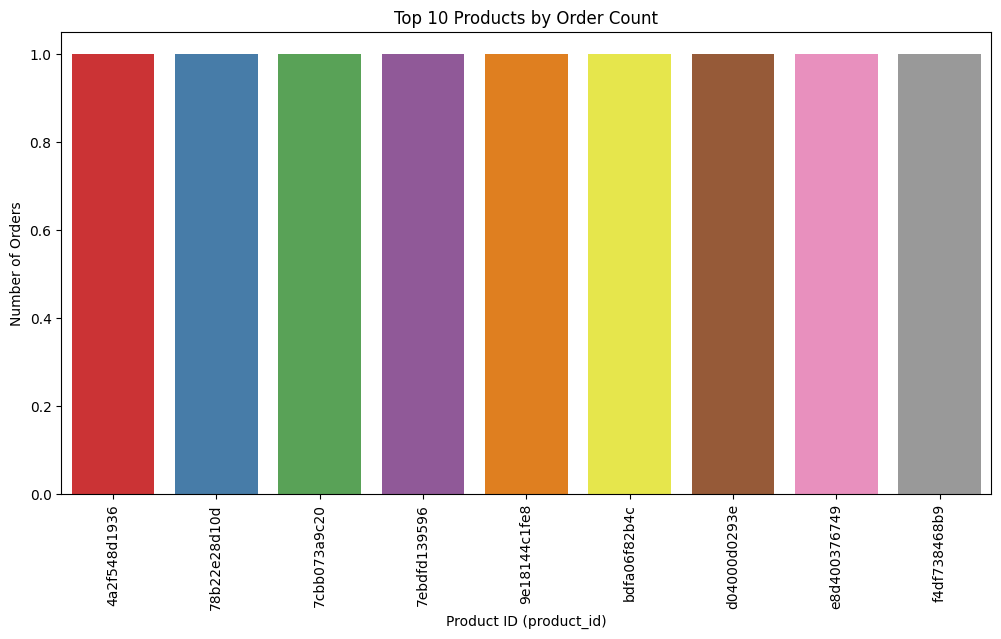

In [23]:
# Calculate the number of orders for each product
product_order_count = cleaned_data.groupby('product_id').size()

# Display the top 10 products by order count
top_10_products = product_order_count.sort_values(ascending=False).head(10)

# Plot the bar chart for the top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='Set1')
plt.title('Top 10 Products by Order Count')
plt.xlabel('Product ID (product_id)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

### Top 10 Vendors by Order Count (Cleaned Data)


/tmp/ipykernel_3831/1164377770.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_vendors.index, y=top_10_vendors.values, palette='Set2')


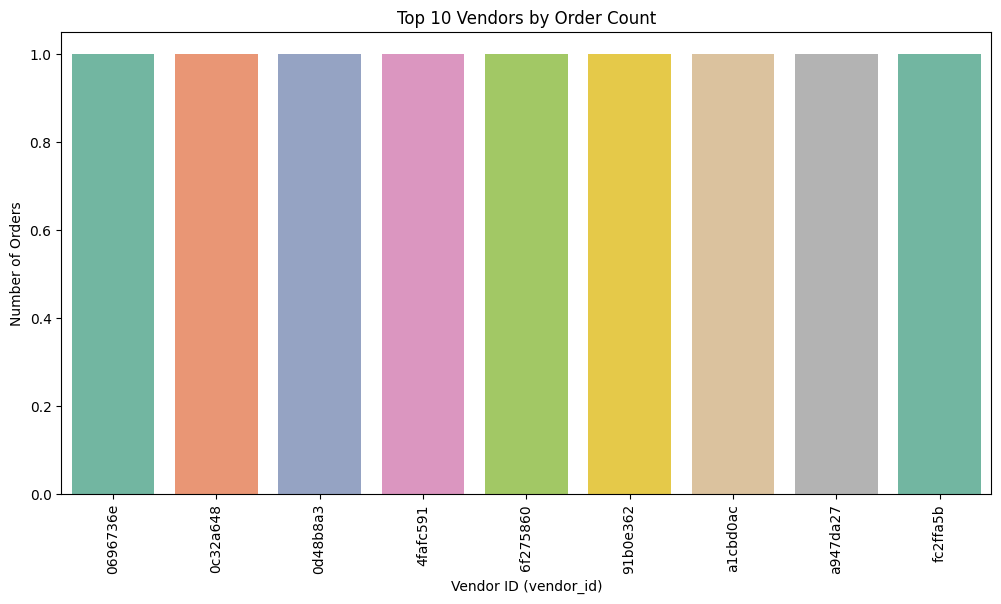

In [24]:
# Calculate the number of orders for each vendor
vendor_order_count = cleaned_data.groupby('vendor_id').size()

# Display the top 10 vendors by order count
top_10_vendors = vendor_order_count.sort_values(ascending=False).head(10)

# Plot the bar chart for the top 10 vendors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_vendors.index, y=top_10_vendors.values, palette='Set2')
plt.title('Top 10 Vendors by Order Count')
plt.xlabel('Vendor ID (vendor_id)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()


In [28]:
cleaned_data.columns

Index(['Unnamed: 0', 'vendor_id', 'product_id', 'name', 'unit_price'], dtype='object')

### Top 10 Products by Unit Price (Cleaned Data)


/tmp/ipykernel_3831/3529903482.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_price_products.index, y=top_10_price_products.values, palette='coolwarm')


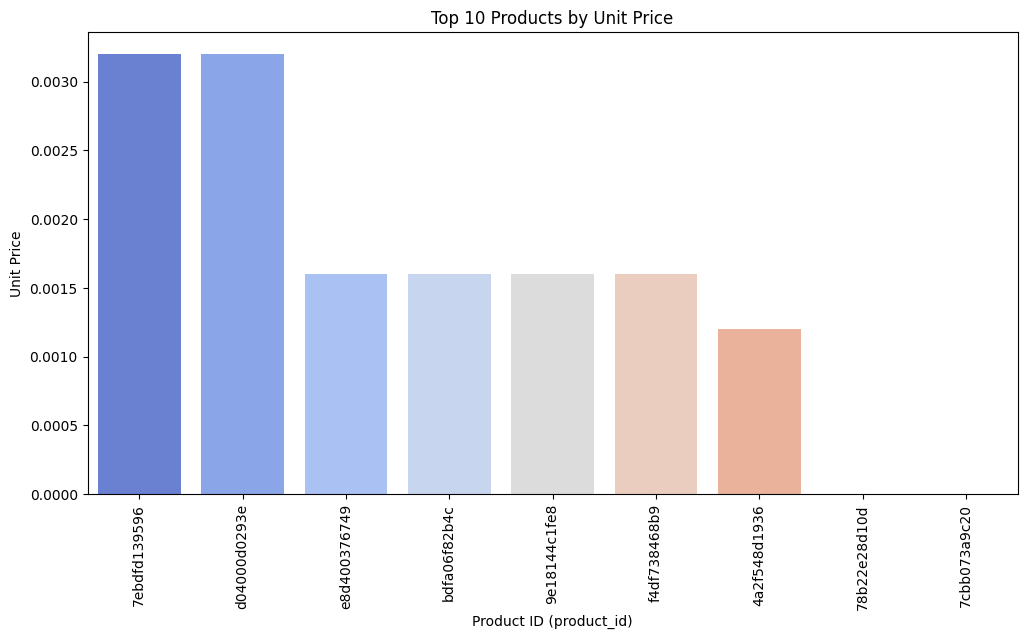

In [30]:
# Calculate the top 10 products by unit price
top_10_price_products = cleaned_data.groupby('product_id')['unit_price'].mean().sort_values(ascending=False).head(10)

# Plot the bar chart for the top 10 products by unit price
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_price_products.index, y=top_10_price_products.values, palette='coolwarm')
plt.title('Top 10 Products by Unit Price')
plt.xlabel('Product ID (product_id)')
plt.ylabel('Unit Price')
plt.xticks(rotation=90)
plt.show()